<h1 style="background-color:white;font-family:rockwell;font-size:290%;text-align:center">Crop Recommendation System</h1>


<a id = 'import'></a>
### Importing the Dataset and the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('./DataSets/Crop_recommendation.csv')
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
data.shape

(2200, 8)

<a id="description-dataset"></a>
### Description about the dataset

In [4]:
data.describe

<bound method NDFrame.describe of         N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]>

<a id="information-dataset"></a>
### Information about the dataset

The dataset above allow the users to build a predictive model to recommend the most suitable crops to grow in a particular farm based on various parameters.

Data fields:

- N - ratio of Nitrogen content in soil
- P - ratio of Phosphorous content in soil
- K - ratio of Potassium content in soil
- temperature - temperature in degree Celsius
- humidity - relative humidity in %
- ph - ph value of the soil
- rainfall - rainfall in mm

In [5]:
data.info

<bound method DataFrame.info of         N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]>

In [6]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

<a id = 'heatmap'></a>
### HeatMap Plotting of the features

<AxesSubplot:>

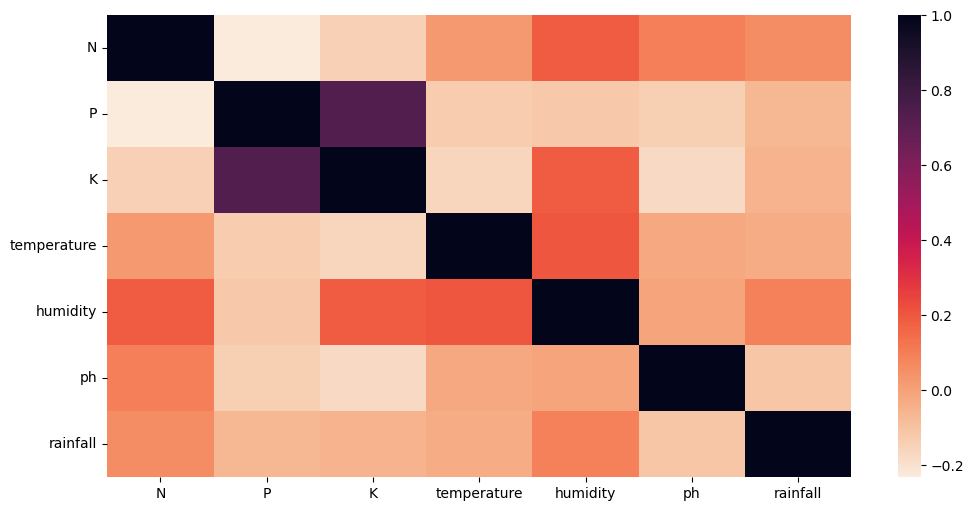

In [8]:
f,ax=plt.subplots(figsize=(12,6))
corr=data.corr()
sns.heatmap(corr , ax=ax ,   cmap="rocket_r")

In [9]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

<a id="eda"></a>
## Part A :: Exploratory Data Analysis
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

<a id = 'np'></a>
### Visualizing the Ratio of Nitrogen and Phosphorous in the soil
Nitrogen becomes available from decomposing soil organic matter. Phosphorus becomes available from decomposing soil organic matter and minerals.

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


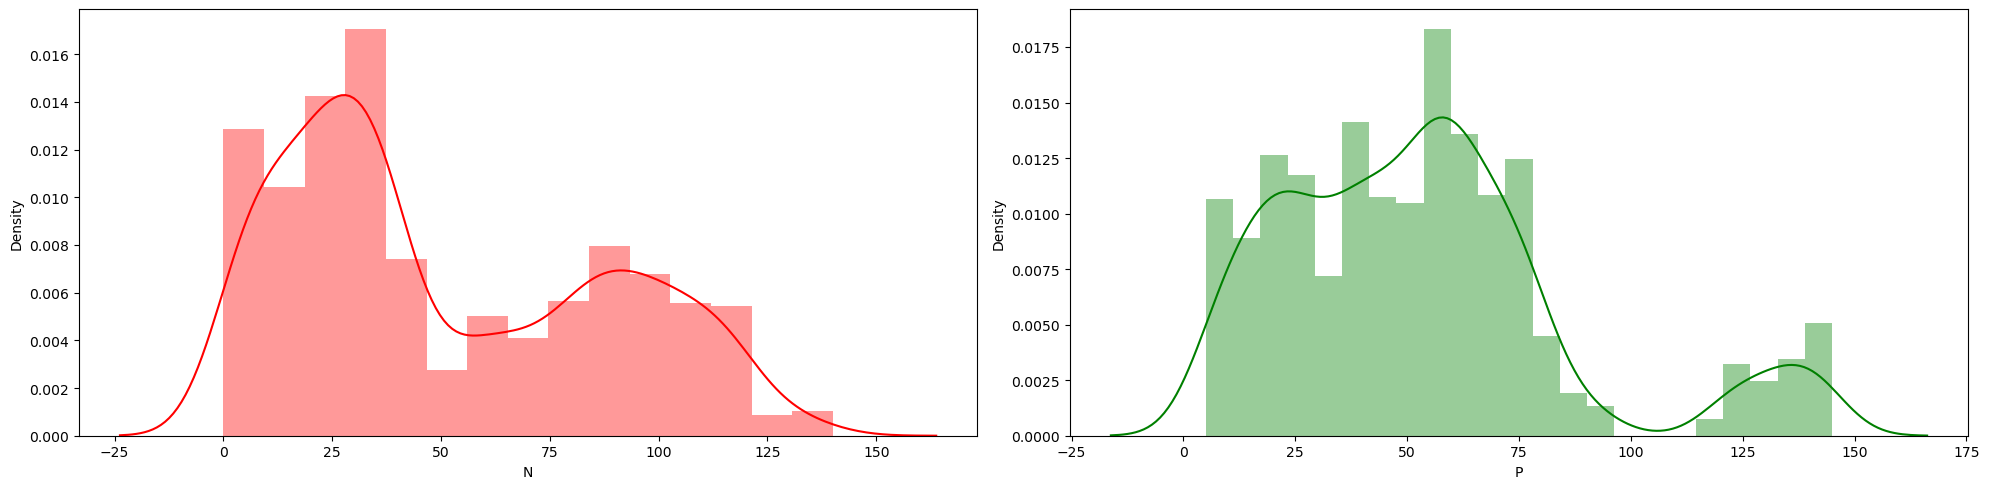

In [10]:
f= plt.figure(figsize=(20,5))
ax=f.add_subplot(121)
sns.distplot(data['N'] , color ='red',ax=ax)

ax=f.add_subplot(122)
sns.distplot(data['P'] , color ='green' , ax = ax)
plt.tight_layout()

<a id = 'np1'></a>
### Visualizing the Ratio of Potassium and Temperature in the soil
Potassium is a critical nutrient that plants absorb from the soil, and from fertilizer. It increases disease resistance, helps stalks to grow upright and sturdy, improves drought tolerance and helps plants get through the winter.

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


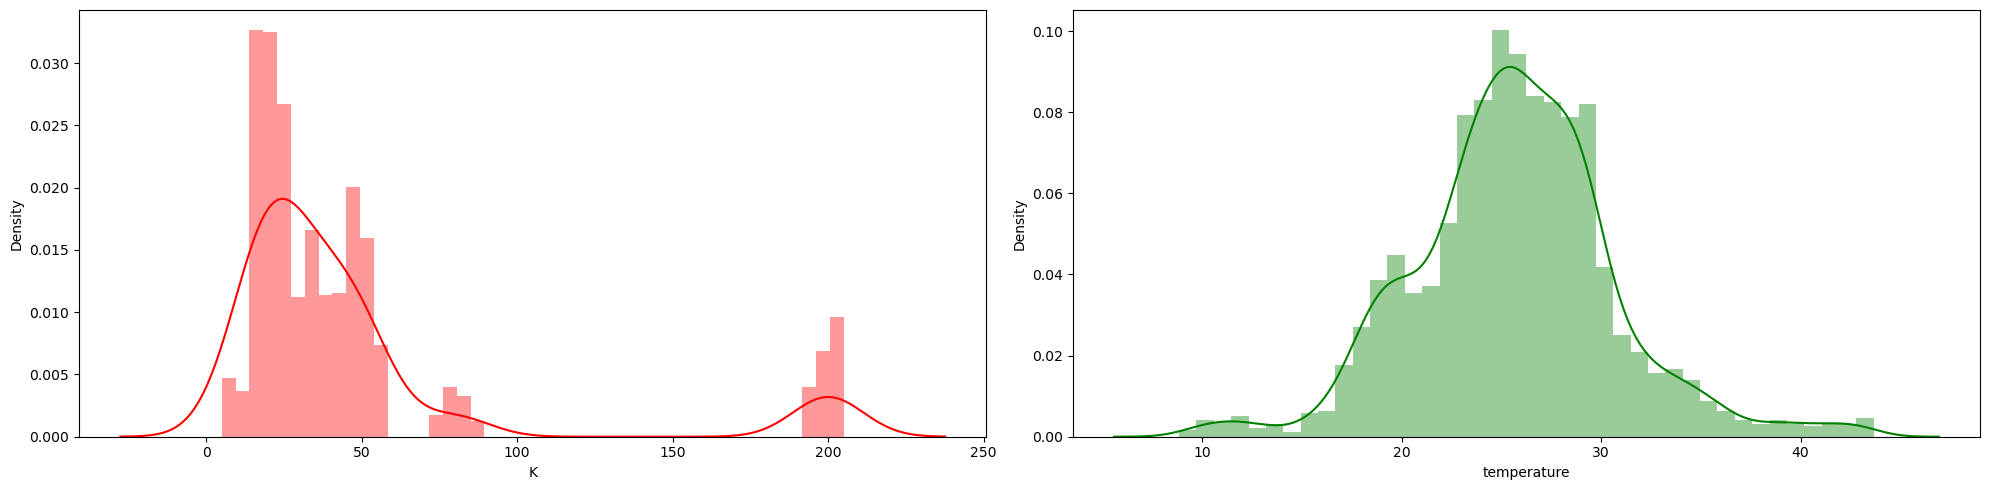

In [11]:
f= plt.figure(figsize=(20,5))
ax=f.add_subplot(121)
sns.distplot(data['K'] , color ='red',ax=ax)

ax=f.add_subplot(122)
sns.distplot(data['temperature'] , color ='green' , ax = ax)
plt.tight_layout()

<a id = 'np2'></a>
### Visualizing the Humidity and pH in the soil
 As moisture increased, pH increased, whereas redox potential (Eh) decreased, and consequently, soil Eh and pHss were negatively correlated.

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


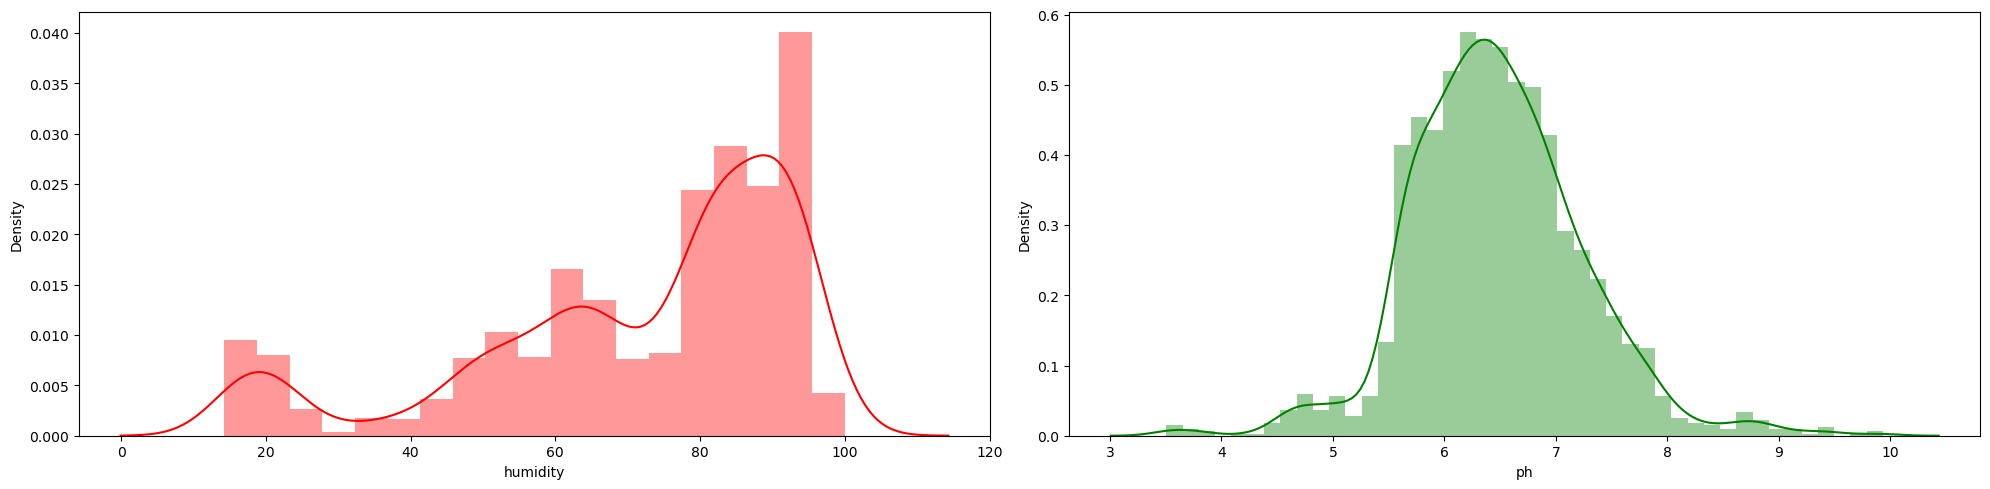

In [12]:
f= plt.figure(figsize=(20,5))
ax=f.add_subplot(121)
sns.distplot(data['humidity'] , color ='red',ax=ax)

ax=f.add_subplot(122)
sns.distplot(data['ph'] , color ='green' , ax = ax)
plt.tight_layout()

<a id = 'np3'></a>
### Visualizing the Rainfall
Soil is also greatly affected by rainfall. If it is too wet or too dry, nutrients in the soil can run off and not make it to the plants' roots, leading to poor growth and overall health. Additionally, as mentioned previously, overwatering or too much rain can also lead to bacteria, fungus, and mold growth in the soil.

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rainfall', ylabel='Density'>

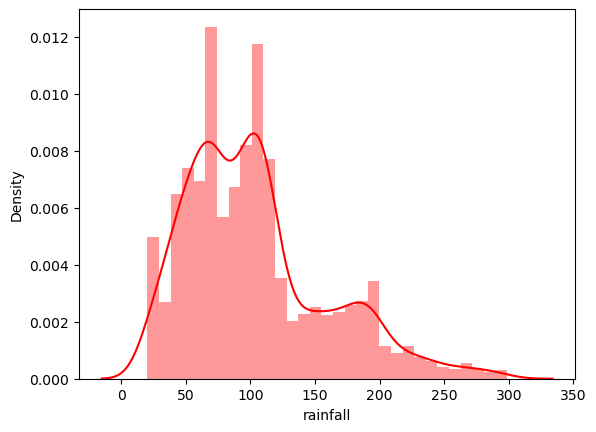

In [13]:
sns.distplot(data['rainfall'],color ='red')

In [14]:
X = data.drop('label' ,axis =1)

<a id = 'label-encoder'></a>
### Introducing Label Encoder
Sklearn provides a very efficient tool for encoding the levels of categorical features into numeric values. LabelEncoder encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels. If a label repeats it assigns the same value to as assigned earlier.

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()

In [17]:
data['label'] = le.fit_transform(data['label'])

In [18]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [19]:
y = data['label']

# train_test_split
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1 = train_test_split(X,y,test_size = 0.2, random_state=42)

# Containers to hold results
model = []
accuracy = []

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

### Logistic Regression

In [21]:
logReg = LogisticRegression(max_iter = 5000)
logReg.fit(x_train1, y_train1)
logReg.score(x_test1, y_test1)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9727272727272728


### Decision Tree Classifier

In [22]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train1, y_train1)
dtc.score(x_test1, y_test1)

0.9886363636363636

### Random Forest Classifier

In [23]:
rfc = RandomForestClassifier()
rfc.fit(x_train1, y_train1)
rfc.score(x_test1, y_test1)

0.9954545454545455

### K-Nearest Neighbour Algorithm

In [24]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 ) 
classifier.fit(x_train1, y_train1) 
classifier.score(x_test1, y_test1)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9704545454545455

### Gausian Naive Bayes Classifier Algorithm

In [25]:
clf = GaussianNB()
clf.fit(x_train1, y_train1) 
clf.score(x_test1, y_test1)

0.9954545454545455

### SVM Classification

In [26]:
svm = SVC()
svm.fit(x_train1, y_train1)
svm.score(x_test1, y_test1)

0.9613636363636363

### Artificial Neural Networks Algorithm

In [27]:
ann = MLPClassifier(alpha=1, max_iter=1000)
ann.fit(x_train1, y_train1)
ann.score(x_test1, y_test1)

0.95

------------------------------------------

<a id = 'conclusion'></a>
## Conclusion and Comparison
We have deployed seven machine learning algorithms and every algorithm is deployed successfully without any hesitation. We have checked the accuracy of the models based on the accuracy score of each of the models. Now let's take a look at the scores of each models.

|Name of the Model|Accuracy Score|
|:---:|:---:|
|Logistic Regression|97.5|
|Decision Tree Classifier|98.6|
|Random Forest Classifier|99.3|
|Naive Bayes Algorithm|99.5|
|KNN Algorithm|97.0|
|Support Vector Machine Algorithm|96.1|
|Artificial Neural Network|95.2|

**Comparing all those scores scored by the machine learning algorithms, it is clear that Naive Bayes Algorithm is having the upper hand in case of this dataset and after this, we can use Logistic Regression, Random Forest Classifier, SVM, which are also having good score as compared to the other deployed algorithms**

Best Fitted Models ranking - 
1. Gausian Naive Bayes
2. Random Forest Classifier
3. Decision Tree Classifier
4. Logistic Regression
5. K-Nearest Neighbours
6. Support Vector Machine
7. Artificial Neural Network


